In [1]:
# Parametersh5_name = '{PATH_1}'protosp_path = '{PATH_2}'library = "CRISPR-DASA2"tsv_path = '{PATH_3}'

In [2]:
library(dplyr)
library(ggplot2)
library(bedr)
library(Biostrings)
library(stringr)
library(lessR)
library(SeuratDisk)
library(Seurat)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union






######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... PASS
    /usr/local/bin/bedtools
  * Checking path for bedops... PASS
    /usr/bin/bedops
  * Checking path for tabix... PASS
    /usr/local/bin/tabix
tests and examples will be skipped on R CMD check if binaries are missing




Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min




Loading required package: S4Vectors



Loading required package: stats4




Attaching package: ‘S4Vectors’




The following objects are masked from ‘package:dplyr’:

    first, rename




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges




Attaching package: ‘IRanges’




The following objects are masked from ‘package:dplyr’:

    collapse, desc, slice




Loading required package: XVector



Loading required package: GenomeInfoDb




Attaching package: ‘Biostrings’




The following object is masked from ‘package:base’:

    strsplit





lessR 4.2.2                         feedback: gerbing@pdx.edu 
--------------------------------------------------------------
> d <- Read("")   Read text, Excel, SPSS, SAS, or R data file
  d is default data frame, data= in analysis routines optional

Learn about reading, writing, and manipulating data, graphics,
testing means and proportions, regression, factor analysis,
customization, and descriptive statistics from pivot tables.
  Enter:  browseVignettes("lessR")

View changes in this or recent versions of lessR.
  Enter: help(package=lessR)  Click: Package NEWS
  Enter: interact()  for access to interactive graphics
  New function: reshape_long() to move data from wide to long





Attaching package: ‘lessR’




The following objects are masked from ‘package:IRanges’:

    reflect, to




The following objects are masked from ‘package:S4Vectors’:

    pc, rename, to, values




The following objects are masked from ‘package:dplyr’:

    recode, rename




The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching SeuratObject



In [3]:
ADD_GUIDE_A_B_COUNTS_BEFORE_DEMUX = FALSE

In [4]:
# Pass these as parameters# library      = "CRISPR7"# tsv_path <- '{PATH_4}'# h5_name  <- '{PATH_5}'# protosp_path = '{PATH_6}'

In [5]:
barcode2guide_tsv_path <- paste0(tsv_path, '{PATH_7}')xlsname <- paste0(tsv_path, '{PATH_8}')tsvname <- paste0(tsv_path, '{PATH_9}')

In [6]:
stats <- c()

In [7]:
barcode2guide_tsv_path

[1] "/data2/kfeng/deeper_guides_dasatinib/dasatinib_primary_01HD/DASA2/tsv/CRISPR-DASA2_ALL_STRUCTURED.TSV"

## Load protospacer file

In [8]:
df_protosp = read.table(protosp_path, header=TRUE, comment.char="")
tfs_w_ntctl    = unique(df_protosp$X.TargetGene)
unselect_ntctl = (tfs_w_ntctl != "NTCTL") & (tfs_w_ntctl != "NTCTRL")
tfs_to_plot    = tfs_w_ntctl[unselect_ntctl]

guides_to_plot  = df_protosp$GuideName
tfs_to_plot
guides_to_plot

[1] "ADNP"    "BRD2"    "CHD2"    "CNOT2"   "GPBP1L1" "HIC2"    "KMT2B"  
 [8] "MNT"     "NTC22"   "NTC28"   "NTC36"   "NTC74"   "NTC82"   "NTC98"  
[15] "PHF6"    "PIAS1"   "PLAGL2"  "PQBP1"   "SIN3A"   "SLTM"    "TSC22D4"
[22] "UBE2L3"  "YEATS4"  "ZBED6"   "ZNF330"  "ZNF669"

[1] "ADNP_1"    "ADNP_2"    "BRD2_1"    "BRD2_2"    "CHD2_1"    "CHD2_2"   
 [7] "CNOT2_1"   "CNOT2_2"   "GPBP1L1_1" "GPBP1L1_2" "HIC2_1"    "HIC2_2"   
[13] "KMT2B_1"   "KMT2B_2"   "MNT_1"     "MNT_2"     "NTC22_1"   "NTC22_2"  
[19] "NTC28_1"   "NTC28_2"   "NTC36_1"   "NTC36_2"   "NTC74_1"   "NTC74_2"  
[25] "NTC82_1"   "NTC82_2"   "NTC98_1"   "NTC98_2"   "PHF6_1"    "PHF6_2"   
[31] "PIAS1_1"   "PIAS1_2"   "PLAGL2_1"  "PLAGL2_2"  "PQBP1_1"   "PQBP1_2"  
[37] "SIN3A_1"   "SIN3A_2"   "SLTM_1"    "SLTM_2"    "TSC22D4_1" "TSC22D4_2"
[43] "UBE2L3_1"  "UBE2L3_2"  "YEATS4_1"  "YEATS4_2"  "ZBED6_1"   "ZBED6_2"  
[49] "ZNF330_1"  "ZNF330_2"  "ZNF669_1"  "ZNF669_2"

# Load and analyze guide capture

In [9]:
df_barcode2guide <-
    read.table(barcode2guide_tsv_path, header = TRUE, sep = "\t", quote = "")

df_barcode2guide <-
    data.frame(lapply(df_barcode2guide, trimws), stringsAsFactors = FALSE)

stats[["Guide-capture UMI counts"]] <- nrow(df_barcode2guide)

# Some ATAC barcodes are not associated with a GEX barcode
# I think those are just sequencing errors. I remove those from the list
select_valid_barcodes <- df_barcode2guide$barcode != ""
df_barcode2guide <- df_barcode2guide[select_valid_barcodes, ]

stats[["Guide-capture UMI counts after removing empty barcodes"]] <-
    nrow(df_barcode2guide)

# Append "-1" to the barcodes. Cellranger appends this number to distinguish
# different samples in aggregated files.
dummy  <- DNAStringSet(df_barcode2guide$barcode)
df_barcode2guide$barcode_dash <- paste0(dummy, "-1")

### Eliminate PCR duplicates of the UMIs from the same barcode

In [10]:
# I already deduplicated guide umis. No more dedup is necessary.
df_deduped <- df_barcode2guide

# df_deduped <- df_barcode2guide %>% distinct(gene, umi, .keep_all = TRUE)

stats[["Guide-capture UMI counts after removing PCR duplicates"]] <-
    nrow(df_deduped)

# dim(df_deduped)

In [11]:
head(df_deduped)

,atac_barcode,umi,protospacer,guide,gene,read_name,barcode,barcode_dash
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,AAACAAGCAAGGGAGC,CATCCCAAGTTA,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10052:11623,GGCTAGTGTCTCACTG,GGCTAGTGTCTCACTG-1
3,ATCAGGTAGCTAGTTT,CCAATTGGCTTA,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10061:2923,CATTATCTCGCATTAA,CATTATCTCGCATTAA-1
4,CATGGCTTCCACGTTA,CACATTTTCTCG,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10089:13449,AGGATTGAGTCAATCA,AGGATTGAGTCAATCA-1
5,ACTGAGGTCGCCCGTA,TTTAATATGTTC,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10154:14715,CAGGTGGAGTATCGCG,CAGGTGGAGTATCGCG-1
6,CAAGGTCCAAGTTAGT,TGAGGCTACGTA,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10255:25915,GGGTTACGTGTTAGCA,GGGTTACGTGTTAGCA-1
7,TAAGCCACAAGGCCAT,TAAGCATCTTAT,CACCCTCTCCGCCGAAGTG,ADNP_1,ADNP,LH00132:93:2257F7LT3:7:1101:10274:27421,TCTTGACGTTTATCGC,TCTTGACGTTTATCGC-1


# Build a df for all barcodes

Summerizing the umi counts, guide counts etc. Find the barcodes that are associated with multiple genes.

In [12]:
# Build two new dfs to summerize guide and gene counts
df_gene_counts <- pivot(df_deduped, table, gene, barcode)
df_guide_counts <- pivot(df_deduped, table, guide, barcode)

# Drop unused columns
df_gene_counts <- select(df_gene_counts, -gene_na, -gene_n)
if(ADD_GUIDE_A_B_COUNTS_BEFORE_DEMUX){
    df_guide_counts <- select(df_guide_counts, -guide_na)
} else {
    df_barcodes <- select(df_guide_counts, -guide_na)
}

# Merge guide and gene columns
if(ADD_GUIDE_A_B_COUNTS_BEFORE_DEMUX) {
    df_barcodes <- merge(df_gene_counts, df_guide_counts, by = "barcode")
}

# n_guides is umi count
df_barcodes <- dplyr:::rename(df_barcodes, n_guides = guide_n)

# Add a "-1" to barcode names to match with multiome barcode
# names from cellranger.
dummy  <- DNAStringSet(df_barcodes$barcode)
df_barcodes$barcode_dash <- paste0(dummy, "-1")


In [13]:
head(df_barcodes, 2)

,barcode,n_guides,ADNP_1,ADNP_2,BRD2_1,BRD2_2,CHD2_1,CHD2_2,CNOT2_1,CNOT2_2,⋯,UBE2L3_2,YEATS4_1,YEATS4_2,ZBED6_1,ZBED6_2,ZNF330_1,ZNF330_2,ZNF669_1,ZNF669_2,barcode_dash
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,AAACAGCCAAACAACA,1,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,AAACAGCCAAACAACA-1
2,AAACAGCCAAAGCGGC,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,AAACAGCCAAAGCGGC-1


In [14]:
colnames(df_barcodes)

[1] "barcode"      "n_guides"     "ADNP_1"       "ADNP_2"       "BRD2_1"      
 [6] "BRD2_2"       "CHD2_1"       "CHD2_2"       "CNOT2_1"      "CNOT2_2"     
[11] "GPBP1L1_1"    "GPBP1L1_2"    "HIC2_1"       "HIC2_2"       "KMT2B_1"     
[16] "KMT2B_2"      "MNT_1"        "MNT_2"        "NTC22_1"      "NTC22_2"     
[21] "NTC28_1"      "NTC28_2"      "NTC36_1"      "NTC36_2"      "NTC74_1"     
[26] "NTC74_2"      "NTC82_1"      "NTC82_2"      "NTC98_1"      "NTC98_2"     
[31] "PHF6_1"       "PHF6_2"       "PIAS1_1"      "PIAS1_2"      "PLAGL2_1"    
[36] "PLAGL2_2"     "PQBP1_1"      "PQBP1_2"      "SIN3A_1"      "SIN3A_2"     
[41] "SLTM_1"       "SLTM_2"       "TSC22D4_1"    "TSC22D4_2"    "UBE2L3_1"    
[46] "UBE2L3_2"     "YEATS4_1"     "YEATS4_2"     "ZBED6_1"      "ZBED6_2"     
[51] "ZNF330_1"     "ZNF330_2"     "ZNF669_1"     "ZNF669_2"     "barcode_dash"

# Load multiome data

In [15]:
seurat <- LoadH5Seurat(h5_name, verbose=FALSE)

Validating h5Seurat file



Loading required package: Signac



rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 




### Intersect guide-capture barcodes with multiome barcodes

In [16]:
# Find overlapping barcodes
multiome_barcodes       <- Cells(seurat)
df_barcodes$in_multiome <- df_barcodes$barcode_dash %in% multiome_barcodes

In [17]:
nrow(seurat)
length(multiome_barcodes)
head(multiome_barcodes)
nrow(seurat@meta.data)
#str(seurat)
length(Cells(seurat))

[1] 22201

[1] 9944

[1] "AAACAGCCAGCATGAG-1" "AAACAGCCAGGACCAA-1" "AAACAGCCAGGCAAGC-1"
[4] "AAACATGCAACTGGCT-1" "AAACATGCACAACCTA-1" "AAACATGCACAATGCC-1"

[1] 9944

[1] 9944

In [18]:
sample_n(df_barcodes, 5)

barcode,n_guides,ADNP_1,ADNP_2,BRD2_1,BRD2_2,CHD2_1,CHD2_2,CNOT2_1,CNOT2_2,⋯,YEATS4_1,YEATS4_2,ZBED6_1,ZBED6_2,ZNF330_1,ZNF330_2,ZNF669_1,ZNF669_2,barcode_dash,in_multiome
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
TGGCTTTGTTCCATTA,614,0,0,0,0,0,0,0,71,⋯,0,0,0,0,0,0,0,0,TGGCTTTGTTCCATTA-1,FALSE
GCAATGAAGTAAACCC,889,90,0,0,0,246,0,0,0,⋯,0,0,0,0,0,0,0,0,GCAATGAAGTAAACCC-1,FALSE
AATGCAACAATTAACC,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,AATGCAACAATTAACC-1,FALSE
GCTATCCTCCTAACGG,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,GCTATCCTCCTAACGG-1,FALSE
TTGGGTTAGGTGAGAC,18,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,2,TTGGGTTAGGTGAGAC-1,FALSE


Write df_barcodes to TSV and XLS

In [19]:
library(writexl)
write_xlsx(df_barcodes, xlsname)
write.table(df_barcodes, tsvname, sep = "\t", quote = FALSE, row.names = FALSE)

# Produce charts

In [20]:
select_gt1_umi_per_cell <- df_barcodes$n_guides > 1
select_convergent       <- df_barcodes$targeted_gene_count == 1

df_barcodes_gt1         <- df_barcodes[select_gt1_umi_per_cell, ]
df_in_multiome          <- df_barcodes[df_barcodes$in_multiome, ]
df_gt1_in_multiome      <- df_barcodes_gt1[df_barcodes_gt1$in_multiome, ]
df_convergent           <- df_barcodes[select_convergent, ]

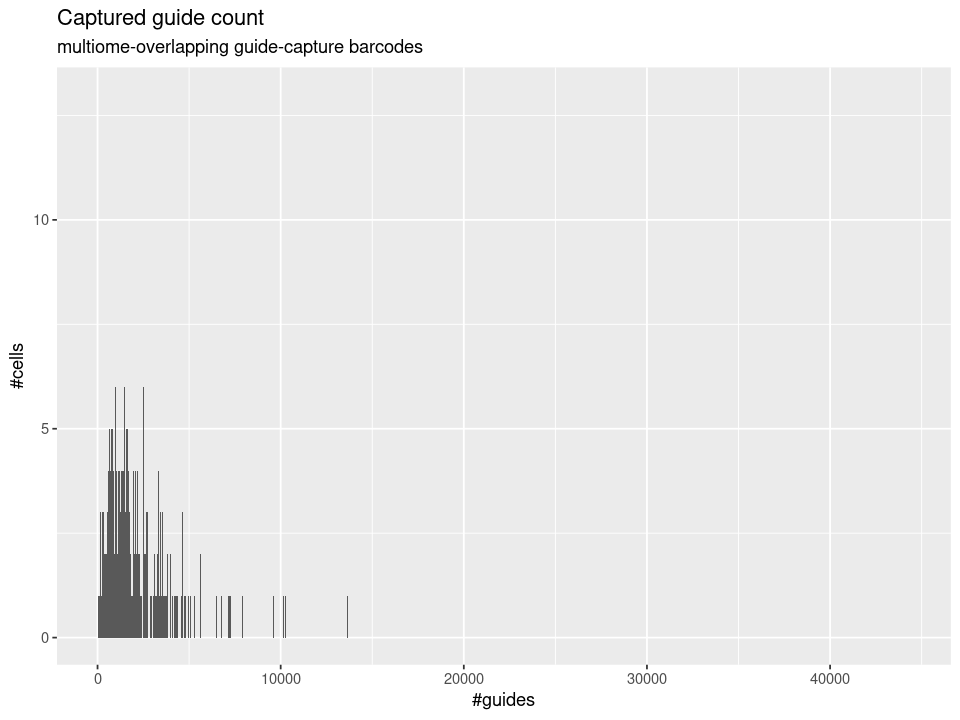

In [21]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df_in_multiome, aes(x = n_guides)) +
    geom_histogram(binwidth=1) +
    labs(title = "Captured guide count", x = "#guides")+
    labs(subtitle = "multiome-overlapping guide-capture barcodes", y = "#cells")
    

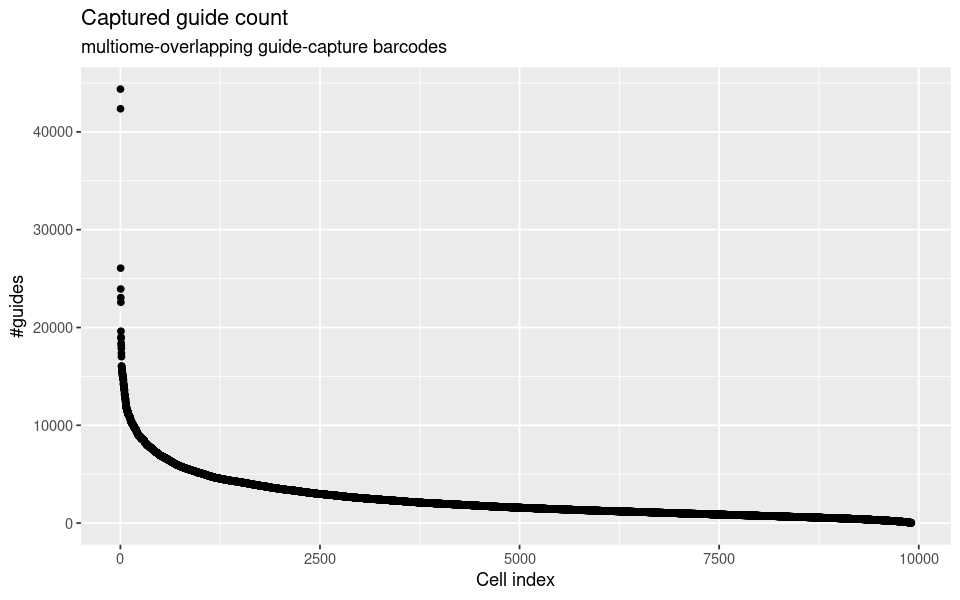

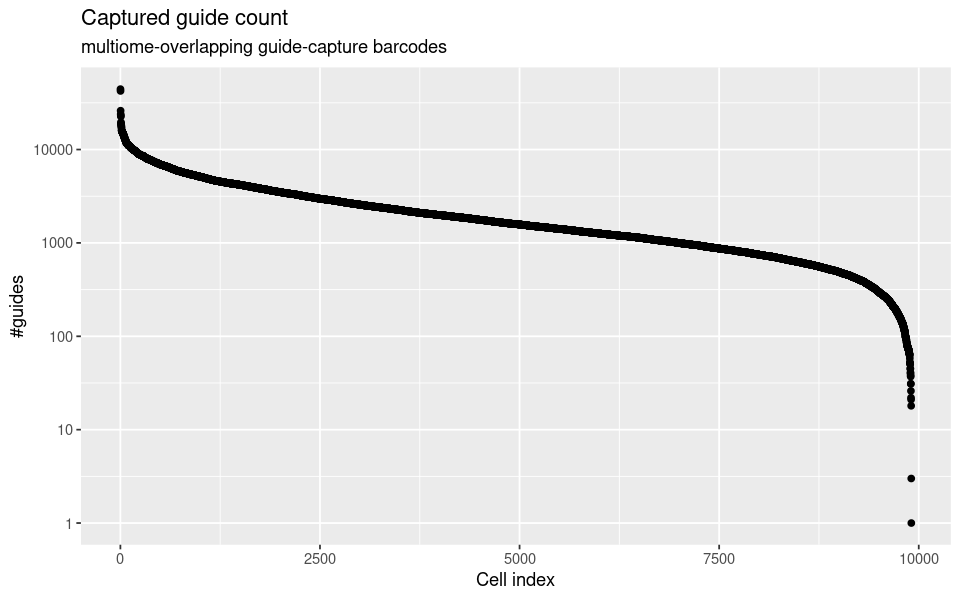

In [22]:
options(repr.plot.width = 8, repr.plot.height = 5)
df_dummy <- df_in_multiome[order(-df_in_multiome$n_guides),]

ggplot(df_dummy, aes(x=1:nrow(df_dummy), y = n_guides)) +
    geom_point() +
    labs(title = "Captured guide count", x = "Cell index") +
    labs(subtitle = "multiome-overlapping guide-capture barcodes", y = "#guides")

ggplot(df_dummy, aes(x=1:nrow(df_dummy), y = n_guides)) +
    geom_point() +
    labs(title = "Captured guide count", x = "Cell index") +
    labs(subtitle = "multiome-overlapping guide-capture barcodes", y = "#guides") +
    scale_y_log10()

In [23]:
# Record stats
stats[["%overlapping"]] <-
    100 * sum(df_barcodes$in_multiome) / length(multiome_barcodes)

stats[["Guide-capture barcodes"]] <- nrow(df_barcodes)
stats[["Multiome barcodes"]]      <- length(multiome_barcodes)
stats[["Overlapping barcodes"]]   <- sum(df_barcodes$in_multiome)
stats[["Overlapping barcodes > 1 UMI"]] <- sum(df_barcodes_gt1$in_multiome)
stats[["Guide capture all convergent"]] <- nrow(df_convergent)
stats[["Guide capture overlapping convergent"]] <-
    sum(df_convergent$in_multiome)
stats[["Median guides per cell (multiome-overlapping)"]] <- median(df_in_multiome$n_guides)

# Print stats

In [24]:
for (tag in names(stats)) {
    if (tag != "Capture efficiency") {
        text <- sprintf("%s\t%g\n", tag, stats[[tag]])
    }
    else {
        text <- sprintf("%s\t%.1f%%\n", tag, stats[[tag]])
    }
    cat(text)
}

Guide-capture UMI counts	8.62281e+07
Guide-capture UMI counts after removing empty barcodes	8.2555e+07
Guide-capture UMI counts after removing PCR duplicates	8.2555e+07
%overlapping	99.6279
Guide-capture barcodes	205348
Multiome barcodes	9944
Overlapping barcodes	9907
Overlapping barcodes > 1 UMI	9906
Guide capture all convergent	0
Guide capture overlapping convergent	0
Median guides per cell (multiome-overlapping)	1589


In [25]:
round(t(as.data.frame(stats)))

Guide.capture.UMI.counts,86228102
Guide.capture.UMI.counts.after.removing.empty.barcodes,82555022
Guide.capture.UMI.counts.after.removing.PCR.duplicates,82555022
X.overlapping,100
Guide.capture.barcodes,205348
Multiome.barcodes,9944
Overlapping.barcodes,9907
Overlapping.barcodes...1.UMI,9906
Guide.capture.all.convergent,0
Guide.capture.overlapping.convergent,0
Median.guides.per.cell..multiome.overlapping.,1589
